<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/Transfer_learing_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
'''
import plaidml.keras
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
'''

'\nimport plaidml.keras\nplaidml.keras.install_backend()\nos.environ["KERAS_BACKEND"] = "plaidml.keras.backend"\n'

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Dataset path location using glob

In [4]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''

"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [5]:
'''
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''

"\nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [6]:
'''
dataset_classes=[building_house,mosque,temple,tinshed,sky_building,mud_house]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)
'''

"\ndataset_classes=[building_house,mosque,temple,tinshed,sky_building,mud_house]\ntotal_class=len(dataset_classes)\nprint('Total dataset class: ',total_class)\n"

## Access Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'

In [6]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocessing using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
WIDTH=224
HEIGHT=224

In [9]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    #rotation_range=30,
                                    height_shift_range=0.1,
                                    fill_mode='nearest')
                                     
validation_generator=ImageDataGenerator(rescale=1./255)

train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical')

validation_dataset = validation_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 1500 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [10]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [11]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

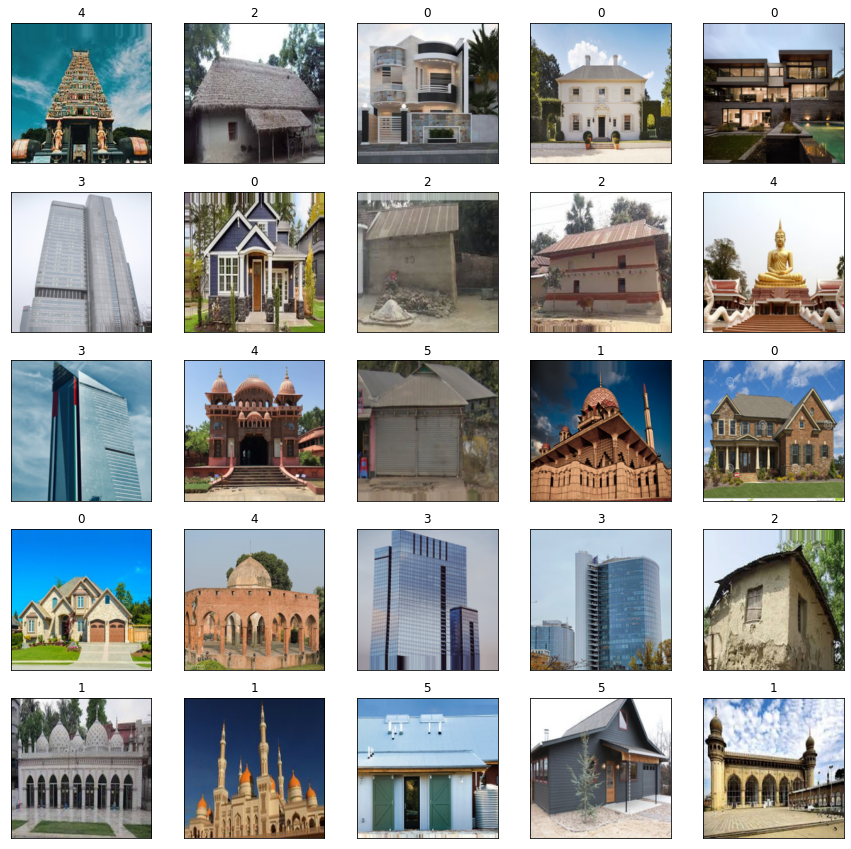

In [13]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

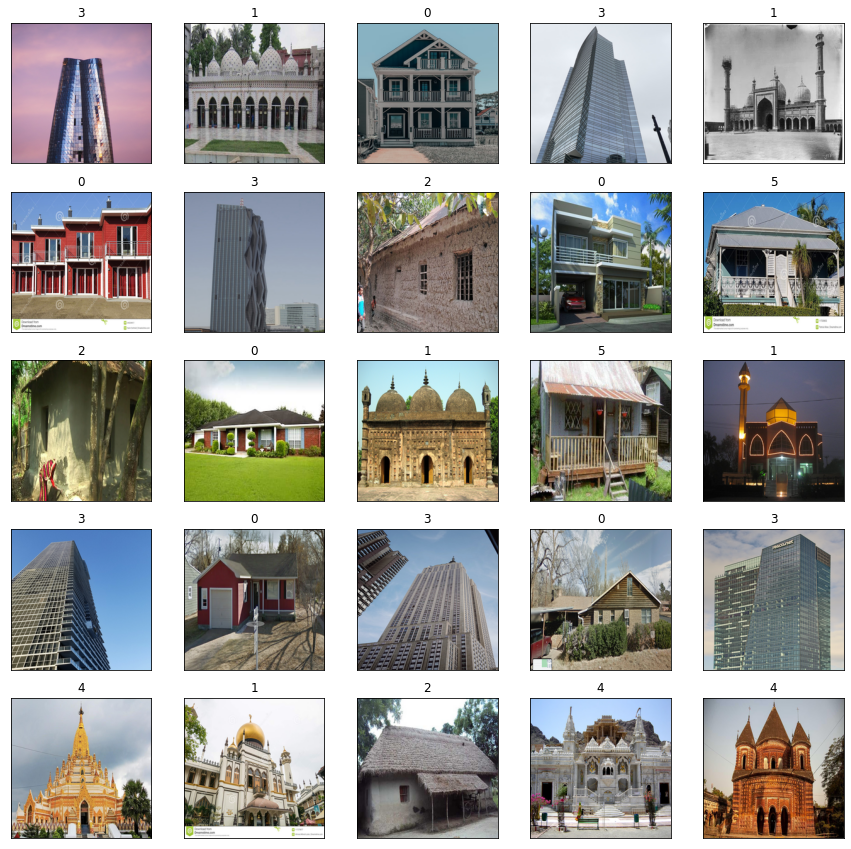

In [14]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import VGG-16

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

In [16]:
base_model=VGG16(input_shape=(224,224,3),include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [20]:
#base_model.summary()

In [17]:
base_model.trainable=False

In [18]:
total_class

6

In [19]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAvgPool2D(),
  #layers.Dense(1024,activation='relu'),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Compile the model

In [20]:
model.compile( loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## Trained the model

In [21]:
epochs=100
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

1500
300
46
9


In [22]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/100
46/46 [==============================] - 877s 18s/step - loss: 1.7509 - accuracy: 0.2411 - val_loss: 1.4506 - val_accuracy: 0.6111
Epoch 2/100
46/46 [==============================] - 27s 593ms/step - loss: 1.4334 - accuracy: 0.5871 - val_loss: 1.2235 - val_accuracy: 0.6910
Epoch 3/100
46/46 [==============================] - 28s 597ms/step - loss: 1.2342 - accuracy: 0.6809 - val_loss: 1.0465 - val_accuracy: 0.7847
Epoch 4/100
46/46 [==============================] - 28s 602ms/step - loss: 1.0657 - accuracy: 0.7495 - val_loss: 0.9249 - val_accuracy: 0.7986
Epoch 5/100
46/46 [==============================] - 28s 598ms/step - loss: 0.9277 - accuracy: 0.7823 - val_loss: 0.8371 - val_accuracy: 0.7604
Epoch 6/100
46/46 [==============================] - 28s 600ms/step - loss: 0.8490 - accuracy: 0.7741 - val_loss: 0.7658 - val_accuracy: 0.7986
Epoch 7/100
46/46 [==============================] - 27s 590ms/step - loss: 0.7697 - accuracy: 0.8115 - val_loss: 0.7055 - val_accuracy: 

## Plot Accuracy and Loss Graph

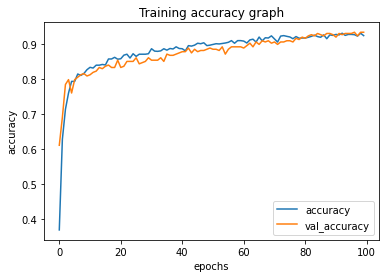

In [23]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

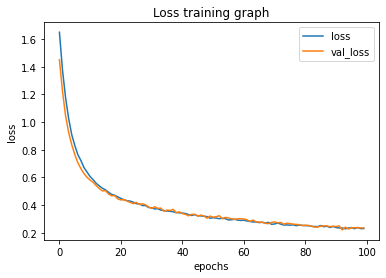

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [25]:
test_loss,test_accuracy=model.evaluate(validation_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

10/10 [==============================] - 7s 678ms/step - loss: 0.2283 - accuracy: 0.9367
Test Loss:  0.22831279039382935
Test Accuracy:  0.9366666674613953


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  93.66666674613953


## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

In [32]:
from tensorflow.keras.preprocessing import image

In [33]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

FileNotFoundError: ignored

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [ ]:
saved_model='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras'

In [30]:
import time
t = time.time()
#export_path_keras = "Saved Model/VGG16_model_{}_time_{}.h5".format(test_accuracy,int(t))
export_path_keras = "saved_model/VGG16_model_{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

saved_model/VGG16_model_0.9366666674613953_time_1617704931.h5


## Reload the model h5 format

In [28]:
from tensorflow.keras.models import load_model

In [29]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


## Experiment with reload model h5 format

In [ ]:
print(len(reload_model.weights))
print(reload_model.output_shape)

## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [ ]:
t = time.time()

export_path_sm = "Saved Model/TL VGG16_{}_model_{}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

## Load SavedModel

In [ ]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [ ]:
reload_tf_saved_model.signatures['serving_default']

In [ ]:
reload_tf_saved_model